"Dataset = 'https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv'
1. Reducer datasettet til Honda'er med benzinmotor
1. Lav linear regression på hestekræfter og highway MPG hvor x er hestekræfter og y er MPG
1. Hvad er koefficienten?
1. Tegn dataen i et scatterplot med regressions ligningen
1. Hvad vil MPG være når en motor har 200 hestekræfter?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

cars = pd.read_csv('cars.csv', decimal=',')
cars.columns = ['Height', 'Length', 'Width', 'Driveline', 'Engine', 'Hybrid', 'Forward Gears', 'Transmission', 'City MPG', 'Fuel', 'Highway MPG', 'Classification', 'ID', 'Make', 'Model', 'Year', 'Horsepower', 'Torque']
cars = cars.set_index('ID')

# Task 1
gas_hondas = cars.query("Make == 'Honda' and Fuel == 'Gasoline'")
gas_hondas.head()

,Height,Length,Width,Driveline,Engine,Hybrid,Forward Gears,Transmission,City MPG,Fuel,Highway MPG,Classification,Make,Model,Year,Horsepower,Torque
ID,,,,,,,,,,,,,,,,,
2010 Honda Accord EX-L V-6 Coup,152,240,57,Front-wheel drive,Honda 3.5L 6 Cylinder 271hp 251 ft-lbs,True,6,6 Speed Manual,17,Gasoline,25,Manual transmission,Honda,2010 Honda Accord Coupe,2010,271,251
2010 Honda Accord EX Coup AT,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Automatic,21,Gasoline,31,Automatic transmission,Honda,2010 Honda Accord Coupe,2010,190,162
2010 Honda Accord EX-L Coup,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Manual,22,Gasoline,31,Manual transmission,Honda,2010 Honda Accord Coupe,2010,190,162
2010 Honda Accord EX-L Coup AT,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Automatic,21,Gasoline,31,Automatic transmission,Honda,2010 Honda Accord Coupe,2010,190,162
2010 Honda Accord EX-L V-6 Coup AT,152,240,57,Front-wheel drive,Honda 3.5L 6 Cylinder 271hp 251 ft-lbs,True,5,5 Speed Automatic,19,Gasoline,28,Automatic transmission,Honda,2010 Honda Accord Coupe,2010,271,251


koefficienten:  -0.07521521138470298


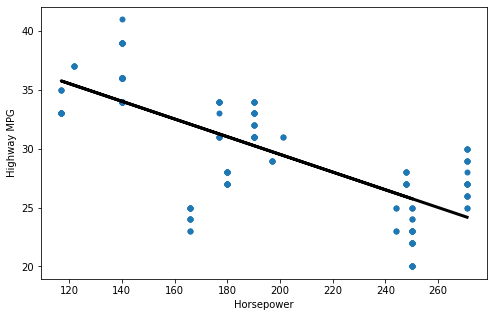

200 Horsepower has a predicted MPG of 29.53


In [2]:
def get_model(xs_reshape, ys):
    model = LinearRegression()
    model.fit(xs_reshape, ys)
    return model

def plot_model(model, xs_reshape, xs, ys):
    plt.figure(figsize=(8,5))
    plt.xlabel("Horsepower")
    plt.ylabel("Highway MPG")
    plt.scatter(xs, ys, s=25)
    plt.plot(xs, model.predict(xs_reshape), linewidth=3, c='k')
    plt.show()

def predict_mpg(model, horsepower):
    return round(model.predict([[horsepower]])[0],2)

ys = gas_hondas['Highway MPG']
xs = gas_hondas['Horsepower']
xs_reshape = np.array(xs).reshape(-1 ,1)

# Task 2
model = get_model(xs_reshape, ys)

# Task 3
print('koefficienten: ',model.coef_[0])

# Task 4
plot_model(model, xs_reshape, xs, ys)

# Task 5
mpg_prediction = predict_mpg(model, 200)
print('200 Horsepower has a predicted MPG of', mpg_prediction)

koefficienten:  -0.03759403945513873


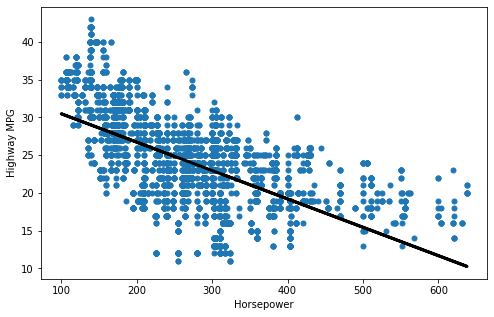

200 Horsepower has a predicted MPG of 26.74


In [4]:
# Drop outlier:
#cars = cars.drop('2011 Chevrolet Silverado 1500 Hybrid 1HY')

ys = cars['Highway MPG']
xs = cars['Horsepower']
xs_reshape = np.array(xs).reshape(-1 ,1)

model = get_model(xs_reshape, ys)

print('koefficienten: ',model.coef_[0])

plot_model(model, xs_reshape, xs, ys)

hp = 200
mpg_prediction = predict_mpg(model, hp)
print(hp, 'Horsepower has a predicted MPG of', mpg_prediction)